In [37]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### dummie
#data = pd.read_csv('Ajuste_Inuclear.txt', delim_whitespace =True)

#### Datos
data= pd.read_csv('ChannelEnergy.txt', delim_whitespace =True)

### Y y sigma Y en canales. x en Energía keV

headers = ["RN","y","x","sigmay"]

data.columns = headers



data

,RN,y,x,sigmay
0,Cs-137,16.35,32.0000,1.90
1,Cd-109,46.54,88.0336,2.86
2,Na-22,256.49,511.0000,10.32
3,Cs-137,329.48,661.6570,11.84
4,Na-22,515.53,1022.0000,13.89
5,Co-60,574.40,1173.2280,16.54
6,Na-22,622.83,1274.5370,18.11
7,Co-60,650.68,1332.4920,17.82
8,Na-22,880.61,1785.5370,20.13


# Método Detallado 

### Ajuste por el metodo de mínimos cuadrados 
$$
\begin{equation}
y(x) = a+bx\\
\end{equation}
$$


$$
\begin{align}
S= \sum \frac{1}{\sigma_i^2}  \; \; \; S_x= \sum \frac{x_i}{\sigma_i^2}\; \; \; S_y= \sum \frac{y_i}{\sigma_i^2}\\
 S_{xx}= \sum \frac{x_i^2}{\sigma_i^2}\; \; \; S_{xy}= \sum \frac{x_iy_i}{\sigma_i^2}
\end{align}
$$

In [38]:
#### Pesos    $w = 1/\sigma^2$
w=1/(data['sigmay']**2)
S=sum(w)

In [39]:
x=data['x']*w
Sx=sum(x)

In [40]:
xx=((data['x'])**2)*w
Sxx=sum(xx)

In [41]:
y=data['y']*w
Sy=sum(y)

In [42]:
xy=(data['x']*data['y'])*w
Sxy=sum(xy)

$$
\begin{align}
a=\frac{1}{\Delta}(S_{xx}S_{y}-S_xS_{xy})\\
b=\frac{1}{\Delta}(SS_{xy}-S_xS_y)\\
\Delta= SS_{xx}-(S_x)^2
\end{align}
$$

In [43]:
### Calculando Delta 
det=(S*Sxx)-(Sx)**2

### Ajuste con pesos de a y b 

In [44]:
a=((Sxx*Sy)-(Sx*Sxy))/det
a

1.4228792591592396

In [45]:
b=((S*Sxy)-(Sx*Sy))/det
b

0.49305667675354248

#### Incertidumbres
$$
\begin{align}
\text{error a}=\sqrt{\frac{S_{xx}}{\Delta}}\\
\text{error b}=\sqrt{\frac{S}{\Delta}}\\
\end{align}
$$

In [46]:
# incertidumbre a
inca= np.sqrt(Sxx/det)
# incertidumbre b
incb=np.sqrt(S/det)

In [47]:
inca

1.667290983516055

In [48]:
incb

0.0058115469159796254

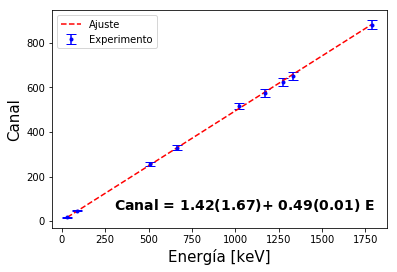

In [61]:
### Experimento 
plt.errorbar(data['x'],data['y'], yerr=data['sigmay'],fmt='.b',label='Experimento',capsize=5)

### Ajuste
plt.plot(data['x'],a +b*data['x'],'--r',label='Ajuste')


##### Dummie
#plt.xlabel(r'x',size=15)
#plt.ylabel(r'y',size=15)

##### Canal- Energía
plt.xlabel(r'Energía [keV]',size=15)
plt.ylabel(r'Canal',size=15)

tx=r'$\mathbf{{Canal}}$ = {:.2f}({:.2f})+ {:.2f}({:.2f}) E'
plt.annotate(tx.format(a,inca,b,incb),xy=(300, 50), fontsize=14, fontweight="bold")
#plt.text(12,4,'y=')
plt.legend()

#### Chi cuadrado

In [62]:
chicuadrado= sum(((data['y']-(a+(b*data['x'])))/data['sigmay'])**2)

In [63]:
chicuadrado

1.6650966829060525

# Método "rápido" python 

In [64]:
def func(x,c,d):
    return c+d*x

In [65]:
#### curve fit [with only y-error]
popt,pcov=curve_fit(func,data['x'],data['y'],sigma=data['sigmay'])

In [66]:
pcov

array([[  6.61247595e-01,  -9.49678815e-04],
       [ -9.49678815e-04,   8.03386947e-06]])

In [67]:
perr=np.sqrt(np.diag(pcov))

In [68]:
### print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma estimates')
print('-------')
for i in range(len(popt)):
    print(str(popt[i])+'+-'+str(perr[i]))

fit parameter 1-sigma estimates
-------
1.42287934192+-0.813171319386
0.493056676764+-0.00283440813326


In [69]:
c=popt[0]
incc=perr[0]
d=popt[1]
incd=perr[1]

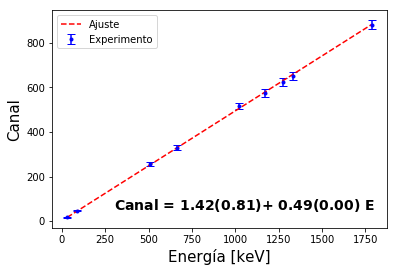

In [78]:
plt.errorbar(data['x'],data['y'], yerr=data['sigmay'],fmt='.b',label='Experimento',capsize=4)
plt.plot(data['x'],c +d*data['x'],'--r',label='Ajuste')
#plt.xlabel(r'x',size=15)
#plt.ylabel(r'y',size=15)

##### Canal- Energía
plt.xlabel(r'Energía [keV]',size=15)
plt.ylabel(r'Canal',size=15)



tx=r'$\mathbf{{Canal}}$ = {:.2f}({:.2f})+ {:.2f}({:.2f}) E'
plt.annotate(tx.format(c,incc,d,incd),xy=(300,50), fontsize=14, fontweight="bold")
#plt.text(12,4,'y=')
plt.legend()

In [71]:
chicuadrado= sum(((data['y']-(c+(d*data['x'])))/data['sigmay'])**2)
chicuadrado

1.6650966829060607